# Introduction to Decision Trees

## Introduction



Decision trees are a powerful and popular machine learning technique. The basic concept is very similar to trees you may have seen commonly used to aid decision-making. Here's an example:


<img width="300" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1FYLn_lVbErtc7zNMneJ0yHlszXHSSEGt">

In the diagram above, we're deciding whether we should wrestle a bear that's in front of us. We're using various criteria to make our final decision, including the size of the bear, and whether escape is possible. Let's say we had a data set of people who survived bear encounters and the actions they took:

```python
Bear name    Size    Escape possible?    Action
Yogi         Small   No                  Wrestle
Winnie       Small   Yes                 Wrestle
Baloo        Large   Yes                 Run away
Gentle Ben   Large   No                  Wrestle
```

If we wanted to optimize our chances of surviving a bear encounter, we could construct a **decision tree** to tell us what action to take.

As our data set gets larger though, this becomes less and less practical. What if we had 10000 rows and 10 variables? Would you want to look through all of the possibilities to construct a tree?

This is where the decision tree machine learning algorithm can help. It enables us to automatically construct a decision tree that tells us what outcomes we should predict in certain situations.

The **decision tree** algorithm is a **supervised learning** algorithm -- we first construct the tree with historical data, and then use it to predict an outcome. One of the **major advantages** of **decision trees** is that they **can pick up nonlinear interactions between variables** in the data that linear regression can't. In our bear wrestling example, a decision tree can pick up on the fact that you should only wrestle large bears when escape is impossible, whereas a linear regression would have had to weight both factors in the absence of the other.

We can use trees for **classification** or **regression** problems. In this lesson, we'll walk through the building blocks of making a decision tree automatically.

## Overview of the Data Set




We'll be looking at individual income in the United States. The **data** is from the **1994 census**, and contains information on an individual's **marital status**, **age**, **type of work**, and more. The **target column**, or what we want to predict, is whether individuals make less than or equal to 50k a year, or more than **50k a year**.

You can download the data from the [University of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Adult).


In [1]:
import pandas as pd

# Set index_col to False to avoid pandas thinking that the first column
# is row indexes (it's age)

income = pd.read_csv("income.csv", index_col=False)
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Converting Categorical Variable




As we can see in our data, we have categorical variables such as **workclass** that have string values. Multiple individuals can share the same string value. The types of work include **State-gov**, **Self-emp-not-inc**, **Private**, and so on. Each of these strings is a label for a category. Another example of a column of categories is **sex**, where the options are **Male** and **Female**.

Before we get started with decision trees, we need to **convert the categorical variables in our data set to numeric variables**. This involves assigning a number to each category label, then converting all of the labels in a column to the corresponding numbers.

One strategy is to convert the columns to a [categorical](https://pandas-docs.github.io/pandas-docs-travis/categorical.html) type. Under this approach, pandas will display the labels as strings, but internally store them as numbers so we can do computations with them. The numbers aren't always compatible with other libraries like **Scikit-learn**, though, so it's easier to just do the conversion to numeric upfront.

We can use the [pandas.Categorical](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Categorical.html#pandas.Categorical) method from pandas to perform the conversion to numbers.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Convert the rest of the categorical columns in income (**education, marital_status, occupation, relationship, race, sex, native_country**, and **high_income**) to numeric columns.

In [2]:
# Convert a single column from text categories to numbers
col = pd.Categorical(income["workclass"])
income["workclass"] = col.codes
income.workclass.head()

0    7
1    6
2    4
3    4
4    4
Name: workclass, dtype: int8

In [5]:
cols = ['education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', \
        'native_country', 'high_income']

for i in cols:
    col = pd.Categorical(income[i])
    income[i] = col.codes

In [6]:
income

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,high_income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
5,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0
6,49,4,160187,6,5,3,8,1,2,0,0,0,16,23,0
7,52,6,209642,11,9,2,4,0,4,1,0,0,45,39,1
8,31,4,45781,12,14,4,10,1,4,0,14084,0,50,39,1
9,42,4,159449,9,13,2,4,0,4,1,5178,0,40,39,1


## Splitting Data




A **decision tree** is made up of a series of **nodes** and **branches**. A node is where we split the data based on a variable, and a branch is one side of the split. Here's an example:

<img width="300" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1mQgPqrXt-l84ltP6EX9y1YXxDCaOCu7t">


In the diagram above, the node splits the data into two branches, **No** and **Yes**, based on whether the individual works in the private sector (the **workclass** column). We've mapped the value **Private** in the **workclass** column to the numeric code 4 (we can check this by comparing the values in the **workclass** column that used to have the label **Private** with the current values to see where they line up). So the **No** branch corresponds to **workclass != 4**, and the Yes branch corresponds to **workclass == 4**.

This is exactly how a decision tree works -- we keep splitting the data based on variables. As we do this, the tree accumulates more levels. The tree we made above is two levels deep because it has one split, and two "levels" of nodes.

The tree below is three levels deep.

<img width="300" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1rRro7BsYrLt36GMonxl3iOtrRH_QH4KK">

We added another split point to this tree "below", or after, our first split point. This made the tree three levels deep.



## Creating Splits




Now think of rows of data flowing through a decision tree. In the diagram above, we can split the data set into two portions based on whether the individual works in the private sector or not.

**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Split **income** into two parts based on the value of the **workclass** column.
  - **private_incomes** should contain all rows where **workclass** is 4.
  - **public_incomes** should contain all rows where **workclass** is not 4.

In [9]:
private_incomes = income[income.workclass == 4]

In [11]:
public_incomes = income[income.workclass != 4]
public_incomes.shape

(9865, 15)

## Decision Trees as Flows of Data




When we performed the split, **9865** rows went to the left, where **workclass** does not equal 4, and 22696 rows went to the right, where workclass equals 4.

It's useful to think of a decision tree as a flow of rows of data. When we make a split, some rows will go to the right, and some will go to the left. As we build the tree deeper and deeper, each node will "receive" fewer and fewer rows.

Here's a look at the splits, and the number of rows that will exist at each node:

<img width="300" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1sO402qSORB1bfl3e-4l_f4e8c9WxgVDy">

## Splitting Data to Make Predictions




The nodes at the **bottom of the tree**, where we decide to **stop splitting**, are called **terminal nodes**, or **leaves**. When we do our splits, we aren't doing them randomly; we have an objective. Our goal is to ensure that we can make a prediction on future data. In order to do this, all rows in each leaf must have only one value for our target column.

We're trying to predict the **high_income** column.
If **high_income** is 1, it means that the person has an income higher than 50k a year.
If **high_income** is 0, it means that they have an income less than or equal to 50k a year.

After constructing a tree using the **income** data, we'll want to make predictions. In order to do this, we'll take a new row and feed it through our decision tree.

First, we check whether the person works in the private sector. If they do, we'll check to see whether they're native to the US, and so on.

Eventually, we'll reach a leaf. The leaf will tell us what value we should predict for **high_income**.

In order to be able to make this prediction, all of the rows in a leaf should only have a single value for **high_income**. This means that leaves can't have both 0 and 1 values in the **high_income** column. Each leaf can only have rows with the same values for our target column. If this isn't the case, we won't be able to make effective predictions.

We'll need to continue splitting nodes **until we get to a point where all of the rows in a node have the same value for high_income**.

## Overview of DataSet Entropy





Now that we have a high-level view of how decision trees work, let's explore the details and learn how to perform the splits.

We'll use a specific measure to figure out which variables we should split nodes on. Post-split, we'll have two data sets, each containing the rows from one branch of the split.

Because we're trying to reach the leaves having only **1s** or only **0s** in **high_income**, each split will need to get us closer to that goal.

When we split, we'll try to separate as many **0s** from **1s** in the **high_income** column as we can. In order to do this, we need a metric for how "together" the different values in the **high_income** column are.

Data scientists commonly use a metric called **entropy** for this purpose. **Entropy refers to disorder**. **The more "mixed together" 1s and 0s are, the higher the entropy.** A data set consisting entirely of 1s in the **high_income** column would have **low entropy**.

Entropy, which is not to be confused with entropy from physics, comes from [information theory](https://en.wikipedia.org/wiki/Information_theory). Information theory is based on probability and statistics, and deals with the transmission, processing, utilization, and extraction of information. A key concept in information theory is the notion of a bit of information. One bit of information is one [unit of information](https://en.wikipedia.org/wiki/Units_of_information).

We can represent a bit of information as a binary number because it either has the value 1 or 0. Suppose there's an equal probability of tomorrow being sunny (1) or not sunny (0). If I tell you that it will be sunny, I've given you one bit of information.

We can also think of entropy in terms of information. If we flip a coin where both sides are heads, we know upfront that the result will be heads. We gain no new information by flipping the coin, so entropy is 0. On the other hand, if the coin has a heads side and a tails side, there's a 50% probability that it will land on either. Thus, flipping the coin gives us one bit of information -- which side the coin landed on.

Entropy can be much more complex, especially when we get to cases with more than two possible outcomes, or differential probabilities. A deep understanding of entropy isn't necessary for constructing decision trees, however. If you'd like, you can read more about entropy [at Wikipedia](https://en.wikipedia.org/wiki/Entropy).

The formula for entropy looks like this:

$$E(x) = −\sum_{i=1}^{c}P(x_i)\log⁡_b{P(x_i)}$$

We iterate through each unique value (c) in a single column (in this case, **high_income**), and assign it to i. We then compute the probability of that value occurring in the data ($P(x_i)$). Next we do some multiplication, and sum all of the values together. b is the base of the logarithm. We commonly use the value 2 for this, but we can also set it to 10 or another value.

Let's say we have this data:

```python
age    high_income
25     1
50     1
30     0
50     0
80     1
```

We could compute its entropy like this:

$$
\begin{align}
E(x) =& −\sum_{i=1}^{c}P(x_i)\log_b⁡ P(x_i)\\
E(high\_income)= &−((2/5∗log_2⁡2/5)+(3/5∗log_2⁡3/5))\\
E(high\_income)=&−(−0.5287712379549449+−0.44217935649972373)\\
E(high\_income)=&0.97
\end{align}
$$

We get less than one "bit" of information -- only **.97** -- because there are slightly more **1s** in the sample data than **0s**. This means that if we were predicting a new value, we could guess that the answer is 1 and be right more often than wrong (because there's a **.6** probability of the answer being 1). Due to this prior knowledge, we gain less than a full "bit" of information when we observe a new value.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Compute the entropy of the **high_income** column in the **income** dataframe, and assign the result to **income_entropy**.

In [12]:
import math
# We'll do the same calculation we did above, but in Python
# Passing in 2 as the second parameter to math.log will take a base 2 log
entropy = -(2/5 * math.log(2/5, 2) + 3/5 * math.log(3/5, 2))
print(entropy)

0.9709505944546686


In [23]:
total = income.shape[0]
true_values = income.high_income.sum()
false_values = total - true_values

income_entropy = -(false_values/total * math.log(false_values/total, 2) + true_values/total * math.log(true_values/total, 2))

In [24]:
income_entropy

0.7963839552022132

## Information Gain 




We'll need a way to go from **computing entropy to figuring out which variable to split on**. We can do this using **information gain**, which tells us which split will reduce entropy the most.

Here's the formula for information gain:

$$IG(T,A)=Entropy(T)−\sum_{v\in A}\frac{\left |T_v \right |}{\left |T\right | }Entropy(T_v)$$


It may look complicated, but we'll break it down. We're computing **information gain (IG)** for a given **target variable (T)**, as well as a given variable we want to split on (A).

To compute it, we first calculate the entropy for T. Then, **for each unique value v in the variable A**, we compute the number of rows in which A takes on the value v, and divide it by the total number of rows. Next, we multiply the results by the entropy of the rows where A is v. We add all of these subset entropies together, then subtract from the overall entropy to get information gain.

Here's an alternate explanation. We're finding the entropy of each set post-split, weighting it by the number of items in each split, then subtracting from the current entropy. If the result is positive, we've lowered entropy with our split. The higher the result is, the more we've lowered entropy.

One strategy for constructing trees is to create as many branches at each node as there are unique values for the variable we're splitting on. So if the variable has three or four values, we'd end up with three or four branches. This approach usually involves more complexity than it's worth and doesn't improve prediction accuracy, but it's worth knowing about.

To simplify the calculation of information gain and make splits simpler, we won't do it for each unique value. We'll find the median for the variable we're splitting on instead. Any rows where the value of the variable is below the median will go to the left branch, and the rest of the rows will go to the right branch. To compute information gain, we'll only have to compute entropies for two subsets.

Here's an example that uses the same data set we worked with earlier:

```python
age    high_income
25     1
50     1
30     0
50     0
80     1
```

Let's say we wanted to split this data set based on age. First, we calculate the **median age**, which is **50**. Then, we assign any row with a value less than or equal to the median age the value 0 (in a new column named **split_age**), and the other rows 1.

```python
age    high_income    split_age
25     1              0
50     1              0
30     0              0
50     0              0
80     1              1
```

Now we compute entropy:

$$
\begin{align}
IG(T,A)= & Entropy(T)−\sum_{v\in A}\frac{\left | T_v \right |}{\left |T\right |}Entropy(T_v)\\
=&.97−((\frac{4}{5}\times−(\frac{1}{2}\times\log_2\frac{1}{2}+\frac{1}{2}\times\log_2\frac{1}{2}))+−(\frac{1}{5}\times(0\times\log_20+1\times\log_21)))\\
=&.97−((\frac{4}{5})\times−(−.5+−.5))+(\frac{1}{5}\times−(0+1∗0))\\
=&.97−(\frac{4}{5})\\
=&.17
\end{align}$$



We end up with .17, which means that we gain **.17** bits of information by splitting our data set on the **age** variable.

Recall that our **target variable** is **high_income** so we'll represent the column using $T$ , and the **split_age** is the column we're splitting so we'll represent that column using $A$.

Since we're splitting on the **age** column, we'll need to calculate the probabilities for each unique value in the **split_age** column to get the $Entropy(T_v)$ . Since our unique values in the **split_age** column are 0 and 1, let's start by considering the rows where the value in the **split_age** column is 0 (note that these rows correspond to the split where the median age is less than or equal to 50, the median age). Two of the values in the **high_income** column have a value of 1, while the other two values have a value of 0. Let's now consider the other split, where the value in **split_age** is 1 — this is the split corresponding to those rows where the median age is greater than 50, the median age. We only have one row with a value of 1 for the **high_income** column.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Compute the **information gain** for splitting on the **age** column of **income**.
  - First, compute the **median of age**.
  - Then, assign anything less than or equal to the median to the **left branch**, and anything greater than the median to the **right branch.**
  - Compute the **information gain** and assign it to **age_information_gain.**



In [19]:
import numpy

def calc_entropy(column):
    """
    Calculate entropy given a pandas series, list, or numpy array.
    """
    # Compute the counts of each unique value in the column
    counts = numpy.bincount(column)
    # Divide by the total column length to get a probability
    probabilities = counts / len(column)
    
    # Initialize the entropy to 0
    entropy = 0
    # Loop through the probabilities, and add each one to the total entropy
    for prob in probabilities:
        if prob > 0:
            entropy += prob * math.log(prob, 2)
    
    return -entropy

# Verify that our function matches our answer from earlier
entropy = calc_entropy([1,1,0,0,1])
print(entropy)

information_gain = entropy - ((.8 * calc_entropy([1,1,0,0])) + (.2 * calc_entropy([1])))
print(information_gain)

0.9709505944546686
0.17095059445466854


In [33]:
age_median = income.age.median()

income["age_median"] = income.age < age_median

one_values = income.age_median.sum()
zero_values = total - one_values

In [34]:
age_information_gain = income_entropy - (((one_values/total) * calc_entropy(income.age_median)) + ((false_values/total) * calc_entropy(income.high_income)))

In [36]:
age_information_gain

-0.2938957341040658

## Finding the Best Split




Now that we know how to compute information gain, we can determine the best variable to split a node on. When we start our tree, we want to make an initial split. We'll find the variable to split on by calculating which split would have the highest information gain.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Create a list called **information_gains.**
  - It should contain, in order, the information gain from splitting on these columns: **age**, **workclass**, **education_num**, **marital_status**, **occupation**, **relationship**, **race**, **sex**, **hours_per_week**, **native_country**.
- Find the highest value in the **information_gains** list, and assign the corresponding column name to **highest_gain**.


In [29]:
def calc_information_gain(data, split_name, target_name):
    """
    Calculate information gain given a data set, column to split on, and target
    """
    # Calculate the original entropy
    original_entropy = calc_entropy(data[target_name])
    
    # Find the median of the column we're splitting
    column = data[split_name]
    median = column.median()
    
    # Make two subsets of the data, based on the median
    left_split = data[column <= median]
    right_split = data[column > median]
    
    # Loop through the splits and calculate the subset entropies
    to_subtract = 0
    for subset in [left_split, right_split]:
        prob = (subset.shape[0] / data.shape[0]) 
        to_subtract += prob * calc_entropy(subset[target_name])
    
    # Return information gain
    return original_entropy - to_subtract

# Verify that our answer is the same as on the last screen
print(calc_information_gain(income, "age", "high_income"))


0.047028661304691965


In [ ]:
calc_information_gain()

In [32]:
information_gains = ['age', 'workclass', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'hours_per_week', 'native_country']

list_info = [calc_information_gain(income, i, "high_income") for i in information_gains]
highest_gain = max(list_info)
highest_gain

0.1114272573715438

In [37]:
list_info

[0.047028661304691965,
 0.006810984054396618,
 0.06501298413277423,
 0.1114272573715438,
 0.0015822303843424645,
 0.04736241665026941,
 0.0,
 0.0,
 0.04062246867123487,
 0.00013457344495848567]

## Next Steps




So far, we've been following the [ID3 algorithm](https://en.wikipedia.org/wiki/ID3_algorithm) to construct decision trees. There are other algorithms like [CART](ftp://public.dhe.ibm.com/software/analytics/spss/support/Stats/Docs/Statistics/Algorithms/13.0/TREE-CART.pdf) that use different measures for the split criterion. We'll learn more about these other algorithms in future missions.

# Applying Decision Trees

## Introduction 




In this section, we'll learn about when to use decision trees, and how to use them most effectively.

We'll continue using the 1994 census data on U.S. incomes we worked with in the previous mission. It contains information on marital status, age, type of work, and more. The target column, **high_income**, indicates an income of less than or equal to 50k a year (0), or more than 50k a year (1).

## Using Decision Trees With scikit-learn




We can use the [scikit-learn](http://scikit-learn.org/) package to fit a decision tree. The interface is very similar to other algorithms we've fit in the past.

We use the [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) class for classification problems, and [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) for regression problems. The **sklearn.tree** package includes both of these classes.

In this case, we're predicting a binary outcome, so we'll use a **classifier**.

The first step is to train the classifier on the data. We'll use the fit method on a classifier to do this.

**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Fit **clf** to the income data.
  - Pass in **income[columns]** so that we only use the named columns as predictors.
  - The target is the **high_income** column.

In [38]:
from sklearn.tree import DecisionTreeClassifier

# A list of columns to train with
# We've already converted all columns to numeric
columns = ["age", "workclass", "education_num", "marital_status", 
           "occupation", "relationship", "race", "sex", 
           "hours_per_week", "native_country"]

# Instantiate the classifier
# Set random_state to 1 to make sure the results are consistent
clf = DecisionTreeClassifier(random_state=1)

clf.fit(income[columns], income.high_income)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

## Splitting the Data into Train and Test Sets




Now that we've fit a model, we can make predictions. We'll want to split our data into training and testing sets first. If we don't, we'll be making predictions on the same data that we train our algorithm with. This leads to overfitting, and will make our error appear lower than it is.

While we covered **overfitting** in more depth in previous lessons, here's a quick recap. If you memorize how to perform three specific addition problems (2+2, 3+6, 3+3), you'll get those specific problems correct every time.

On the other hand, if someone asks you what 4+4 is, you won't know how to do it, because you don't know the rules of addition. If you learn the rules of addition, you'll get problems wrong sometimes (because operations like 3443343434+24344343 can be hard to do mentally). Even so, you'll be able to do any problem, and you'll get most of them right.

The first example represents overfitting, where you memorize the details of the training set, but can't generalize to new examples you're asked to make predictions on.

**We can avoid overfitting by always making predictions and evaluating error on data that we haven't trained our algorithm with**. This will show us when we're overfitting by giving us a realistic error on data that the algorithm hasn't seen before.

We can split the data by **shuffling** the order of the dataframe, then selecting certain rows to include in the training set, and certain rows to include in the testing set.

In this case, we'll make **80% of our rows training data**, and the rest testing data.

**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

All of the rows in **income** with a position up to **train_max_row** (but not including it) will be part of the **training set.**
- Make a new dataframe called **train** containing all of these rows.
- Make a dataframe called **test** containing all of the rows with a position greater than or equal to **train_max_row.**

In [39]:
import numpy as np
import math

# Set a random seed so the shuffle is the same every time
np.random.seed(1)

# Shuffle the rows  
# This permutes the index randomly using numpy.random.permutation
# Then, it reindexes the dataframe with the result
# The net effect is to put the rows into random order
income = income.reindex(np.random.permutation(income.index))

train_max_row = math.floor(income.shape[0] * .8)

In [45]:
train = income.iloc[:train_max_row, :]
test = income.iloc[train_max_row:, :]

## Evaluating Error With AUC




While there are many methods for evaluating error with classification, we'll use [AUC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Area_under_curve). AUC ranges from 0 to 1, so it's ideal for binary classification. The higher the AUC, the more accurate our predictions.

We can compute AUC with the [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) function from **sklearn.metrics**. This function takes in two parameters:

- **y_true**: true labels
- **y_score**: predicted labels

It then calculates and returns the AUC value.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Compute the AUC between **predictions** and the **high_income** column of test, and assign the result to **error**.
- Use the print function to display error.

In [52]:
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(random_state=1)
clf.fit(train[columns], train["high_income"])

predictions_test = clf.predict(test[columns])

In [53]:
error = roc_auc_score(test.high_income, predictions_test)
error

0.6934656324746192

## Computing Error on the Training Set




The AUC for the predictions on the testing set is about **.6934**. Let's compare this against the AUC for predictions on the training set to see if the model is overfitting.

It's normal for the model to predict the training set better than the testing set. After all, it has full knowledge of that data and the outcomes. However, if the AUC between training set predictions and actual values is significantly higher than the AUC between test set predictions and actual values, it's a sign that the model may be overfitting.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Print out the AUC score between **predictions** and the **high_income** column of train.

In [54]:
predictions_train = clf.predict(train[columns])

error_2 = roc_auc_score(train.high_income, predictions_train)
error_2

0.9471244501437455

## Decision Tree Overfitting




Our AUC on the training set was **.947**, and the AUC on the test set was **.694**. There's no hard and fast rule on when overfitting is occurring, but our model is predicting the training set much better than the test set. **Splitting the data into training and testing sets doesn't prevent overfitting -- it just helps us detect and fix it.**

Based on our AUC measurements, it appears that we are in fact overfitting. Let's take a closer look at why decision trees might overfit.

In the last mission, we looked at this data:

```python
high_income    age    marital_status
0              20     0
0              60     2
0              40     1
1              25     1
1              35     2
1              55     1
```

Here's the full diagram for the decision tree we can build from it:

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1AZzNvAe_RPNAcyN6G8hx1xg0yppa6kXy">


This tree predicts all of our values perfectly. It will always get a right answer on the training set, but this is equivalent to memorizing the rules of addition. While we've built our tree in such a way that it can perfectly predict the training set, the way it's constructed doesn't make sense when we take a step back.

That's because the tree above is saying that:

- If you're under 22.5 years old, you have a low income
- If you're 22.5 - 37.5, you have a high income
- If you're 37.5 - 47.5, you have a low income
- If you're 47.5 to 55, you have a high income

Finally, if you're above 55, you have a low income.

These rules are very specific to the training set.

Think about the problem with a real-world lens. **Does it make sense to predict that someone who's 20 has a low income, someone who's 25 has a high income, and someone who's 40 has a low income?** Intuitively, we know that younger people tend to earn less, middle-aged people earn more, and people who have retired earn less.

Our tree has created so many age-based splits in an attempt to perfectly predict everyone's income that each split is effectively meaningless.

Here's a tree that matches up with our intuition better:

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1DAQ7yfssDModIunAQTTrxdyTexwgUymw">

All we've done is "pruned" the tree, and removed some of the lower leaves. We've turned some of the higher-level nodes into leaves instead.

The tree above makes more intuitive sense. If you're under 25, we predict low income. If you're between 25 and 55, we predict high income (the .66 rounds up to 1). If you're above 55, we predict low income.

**This version actually has lower accuracy on our training set, but will generalize to new examples better because it matches reality more closely.**

**Trees overfit when they have too much depth** and make overly complex rules that match the training data, but aren't able to generalize well to new data. This may seem to be a strange principle at first, but the deeper a tree is, the worse it typically performs on new data.



## Reducing Overfitting With a Shallower Tree




There are three main ways to combat overfitting:

- "Prune" the tree after we build it to remove unnecessary leaves.
- Use ensembling to blend the predictions of many trees.
- Restrict the depth of the tree while we're building it.

While we'll explore all of these, we'll look at the third method first.

Limiting tree depth during the building process will result in more general rules. This prevents the tree from overfitting.

We can restrict tree depth by adding a few parameters when we initialize the **DecisionTreeClassifier** class:

- **max_depth** - Globally restricts how deep the tree can go
- **min_samples_split** - The minimum number of rows a node should have before it can be split; if this is set to 2, for example, then nodes with 2 rows won't be split, and will become leaves instead
- **min_samples_leaf** - The minimum number of rows a leaf must have
- **min_weight_fraction_leaf** - The fraction of input rows a leaf must have
- **max_leaf_nodes** - The maximum number of total leaves; this will cap the count of leaf nodes as the tree is being built

Some of these parameters aren't compatible, however. For example, we can't use **max_depth** and **max_leaf_nodes** together.

Now that we know what to tweak, let's improve our model.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Set **min_samples_split** to 13 when creating the **DecisionTreeClassifier.**
- Make predictions on the training set, compute the AUC, and assign it to **train_auc.**
- Make predictions on the test set, compute the AUC, and assign it to **test_auc.**


In [55]:
#decision = DecisionTreeClassifier(min_samples_split=13, random_state=1)

clf.min_samples_split = 13

train_auc = roc_auc_score(train.high_income, predictions_train)
test_auc = roc_auc_score(test.high_income, predictions_test)


## Tweaking Parameters to Adjust AUC




By setting **min_samples_split** to **13**, we managed to boost the test AUC from **.694** to **.699**. The training set AUC decreased from **.947** to **.842**, showing that the model we built was less overfit to the training set than before:

| settings              | train AUC | test AUC |
|-----------------------|-----------|----------|
| default               | 0.947     | 0.694    |
| min_samples_split: 13 | 0.842     | 0.699    |


Let's play around with parameters some more.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Set **max_depth** to 7 and **min_samples_split** to 13 when creating the **DecisionTreeClassifier**.
- Make predictions on the training set, compute the AUC, and assign it to **train_auc**.
- Make predictions on the test set, compute the AUC, and assign it to **test_auc.**

In [ ]:
# put your code here

## Tweaking Tree Depth to Adjust AUC




We just improved the AUC again! The test set AUC increased to **.743**, while the training set AUC decreased to **.748**:

| settings                                        | train AUC | test AUC |
|-------------------------------------------------|-----------|----------|
| default (min_samples_split: 2, max_depth: None) | 0.947     | 0.694    |
| min_samples_split: 13                           | 0.842     | 0.699    |
| min_samples_split: 13, max_depth: 7             | 0.748     | 0.743   |

We aren't overfitting anymore because both AUC values are about the same. Let's tweak the parameters more aggressively and see what happens!


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Set **max_depth** to 2 and **min_samples_split** to 100 when creating the **DecisionTreeClassifier.**
- Make predictions on the training set, compute the AUC, and assign it to **train_auc**.
- Make predictions on the test set, compute the AUC, and assign it to **test_auc**.

In [ ]:
# put your code here

## Underfitting in Simplistic Trees




Our accuracy went down on the last screen, relative to the screen before it:

| settings                                        | train AUC | test AUC |
|-------------------------------------------------|-----------|----------|
| default (min_samples_split: 2, max_depth: None) | 0.947     | 0.694    |
| min_samples_split: 13                           | 0.842     | 0.699    |
| min_samples_split: 13, max_depth: 7             | 0.748     | 0.743   |
| min_samples_split: 100, max_depth: 2            | 0.662     | 0.655    |


This is because we're now [underfitting](http://datascience.stackexchange.com/questions/361/when-is-a-model-underfitted). Underfitting is what occurs when our model is too simple to explain the relationships between the variables.

Let's go back to our tree diagram to explain underfitting.

Here's the data:

>```python
high_income    age    marital_status
0              20     0
0              60     2
0              40     1
1              25     1
1              35     2
1              55     1
```

And here's the "right fit" tree. This tree explains the data properly, without overfitting:

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1OpRlWK8fQlzV469HqC5JndXbXe6dNifH">

Let's trim this tree even more to show what happens when the model isn't complex enough to explain the data:


<img width="300" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1r6pvqpGC4kPSihWWGvrjlq6XD4wXSY40">

This model will predict that anyone under **37.5** has a high income (**.66** rounds up), and anyone over **37.5** has a low income (**.33** rounds down). It's too simple to model reality, in which people earn less while they're young, more during middle age, and less again after retirement.

Therefore, this tree underfits the data and will have lower accuracy than the appropriate version.

## The Bias-Variance Tradeoff


By artificially restricting the depth of our tree, we prevent it from creating a model that's complex enough to correctly categorize some of the rows. If we don't perform the artificial restrictions, however, the tree becomes too complex, fits quirks in the data that only exist in the training set, and doesn't generalize to new data.

This is known as the [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). Imagine that we take a random sample of training data and create many models. If the models' predictions for the same row are far apart from each other, we have high variance. Imagine this time that we take a random sample of the training data and create many models. If the models' predictions for the same row are close together but far from the actual value, then we have high bias.

High bias can cause underfitting -- if a model is consistently failing to predict the correct value, it may be that it's too simple to model the data faithfully.

High variance can cause overfitting. If a model varies its predictions significantly based on small changes in the input data, then it's likely fitting itself to quirks in the training data, rather than making a generalizable model.

We call this the bias-variance tradeoff because decreasing one characteristic will usually increase the other. This is a limitation of all machine learning algorithms. If you'd like to read more about the tradeoff, check out [programmer Scott Fortmann-Roe's](http://scott.fortmann-roe.com/docs/BiasVariance.html) post on this topic.

Decision trees typically suffer from high variance. The entire structure of a decision tree can change if we make a minor alteration to its training data. By restricting the depth of the tree, we increase the bias and decrease the variance. If we restrict the depth too much, we increase bias to the point where it will underfit.

You'll generally need to use your intuition and manually tweak parameters to get the "right" fit.


**Exercise Start**

<left><img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


We can induce variance and see what happens with a decision tree. To introduce noise into the data, we'll add a column of random values. A model with high variance (like a decision tree) will pick up on this noise, and overfit to it. This is because models with high variance are very sensitive to small changes in input data.


- Fit the classifier to the training data.
- Make predictions on the training set, compute the AUC, and assign it to **train_auc.**
- Make predictions on the test set, compute the AUC, and assign it to **test_auc.**

In [ ]:
numpy.random.seed(1)

# Generate a column containing random numbers from 0 to 4
income["noise"] = numpy.random.randint(4, size=income.shape[0])

# Adjust "columns" to include the noise column
columns = ["noise", "age", "workclass", "education_num", "marital_status", 
           "occupation", "relationship", "race", "sex", 
           "hours_per_week", "native_country"]

# Make new train and test sets
train_max_row = math.floor(income.shape[0] * .8)
train = income.iloc[:train_max_row]
test = income.iloc[train_max_row:]

# Initialize the classifier
clf = DecisionTreeClassifier(random_state=1)


# put your code here

## Visualizing a Decision Tree Model

In [25]:
!conda install -c conda-forge pydotplus  -y

Solving environment: done

## Package Plan ##

  environment location: /anaconda3

  added / updated specs: 
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    ca-certificates-2018.11.29 |       ha4d7672_0         143 KB  conda-forge
    certifi-2018.11.29         |        py36_1000         145 KB  conda-forge
    scikit-learn-0.20.1        |   py36h4f467ca_0         5.2 MB
    mkl-2018.0.3               |                1       149.2 MB
    ------------------------------------------------------------
                                           Total:       154.7 MB

The following NEW packages will be INSTALLED:

    pydotplus:       2.0.2-py_1                            conda-forge

The following packages will be UPDATED:

    ca-certificates: 2018.10.15-ha4d7672_0                 conda-forge -->

macOS users might have to install GraphViz

```bash
brew install graphviz
```

In [44]:
import pydotplus
from IPython.display import Image
from sklearn import tree

In [45]:
# create a DOT data
dot_data = tree.export_graphviz(clf,
                               out_file=None,
                               feature_names=train[columns].columns,
                               class_names=train.high_income.astype(str).unique())

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

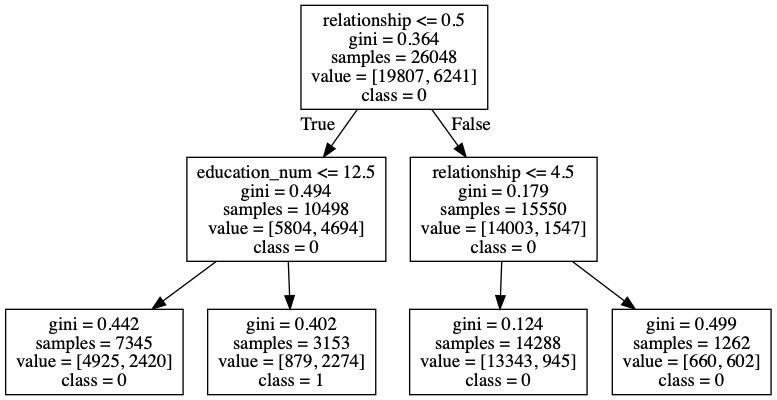

In [47]:
# Show graph
Image(graph.create_png())

#graph.write_png("tree.png")

## Knowing When to Use Decision Trees

Let's go over the main advantages and disadvantages of using decision trees. The main advantages of using decision trees is that they're:

- Easy to interpret
- Relatively fast to fit and make predictions
- Able to handle multiple types of data
- Able to pick up nonlinearities in data, and usually fairly accurate

The main disadvantage of using decision trees is their **tendency to overfit**.

Decision trees are a good choice for tasks where it's important to be able to interpret and convey why the algorithm is doing what it's doing.

The most powerful way to reduce decision tree overfitting is to create ensembles of trees. The [random forest](https://en.wikipedia.org/wiki/Random_forest) algorithm is a popular choice for doing this. In cases where prediction accuracy is the most important consideration, random forests usually perform better.

In the next mission, we'll explore the random forest algorithm in greater depth.